In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import process_location
import imp
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
imp.reload(process_location)
%matplotlib inline

In [360]:
folder = '/Users/alexandreattia/Desktop/Work/Practice/LocationHistory/LocationHistoryData/'
cookie_content = 'gsScrollPos=; _ga=GA1.1.499376354.1458118162; OGPC=732465152-21:699960320-14:448059392-45:527891456-115:904765440-5:979538944-3:; NID=101=tqyY6EIuMfyPA_4R8lQoBi1J4xRqgqtys7_LYTxMcGmJ-uH2kl6snZzvhppOGQWdVP9-f8_PnIQRhCuvSQcKAgwiuNnSveBzJn9MIO3vWYRA6QCJl3rFlw8_zXgCClR0G15QPaY1HX_peTq5OhyUcBge0c0sIKIneXRTy7OLsZq4dt3Sy9wSoHNg52PB7-nqTnDm4071yVAOlm2sWBLRTntEHT6gkuGPzL5qwlMHXYgAda6myU5Vw8sjUms01KtkvNv15JEY24F86h3tPcKbxXZqFnhFLF_-; SID=kgT5WMVhEsccYbfm_yITHcsGXiKUfYY-BPsG26VOh-rmOmZKulU9DQmdNY7vJJmduYXiWQ.; HSID=A9dygpUeleDXWXChh; SSID=AuatJj4wP3vf2PeV3; APISID=ZzMrJRe6AR4eIcz-/AIdBTGY21EnIIMJgz; SAPISID=WEW2s3tyVHa9d0Sn/AZ6_sTv_v54AIVhdv; CONSENT=YES+FR.fr+20150726-13-0; gsScrollPos='
# process_location.create_kml_files('march', 29, 'april', 31, cookie_content, folder)
df = process_location.full_df(folder)

75 KML files (ie 75 days) to concatenate


## Stats 

In [187]:
df_driving = process_location.time_at_doing(df, 'driving')
df_work = process_location.time_at_place(df, 'Work')
# Special, so not currently doable by the script
df_home_all = df[(df.Address == 'Home')]
df_home_week_day = df[(df.Address == 'Home') & (df.WeekDay < 5)]
df_home_all['DurationMin'] = df_home_all['Duration'].apply(process_location.get_sec) / 60

/Users/alexandreattia/Desktop/Work/Practice/LocationHistory/process_location.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df2['DurationMin'] = df2['Duration'].apply(get_sec) / 60


For 76 days, I have been driving 4.3 times/day : 5764.1 km in total (79.0 km/days).
On average, each time I am driving is for 27.3 min and 18.2 km.
For 76 days, I have been 49 times at Work for a total of 401.6 hours or 8.2 hours/day


/Users/alexandreattia/Desktop/Work/workenv/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Before moving out, in average:
-99.8min per day
-63.4km per day
-34.6km/h per day

After moving out, in average:
-123.7min per day
-83.7km per day
-41.1km/h per day


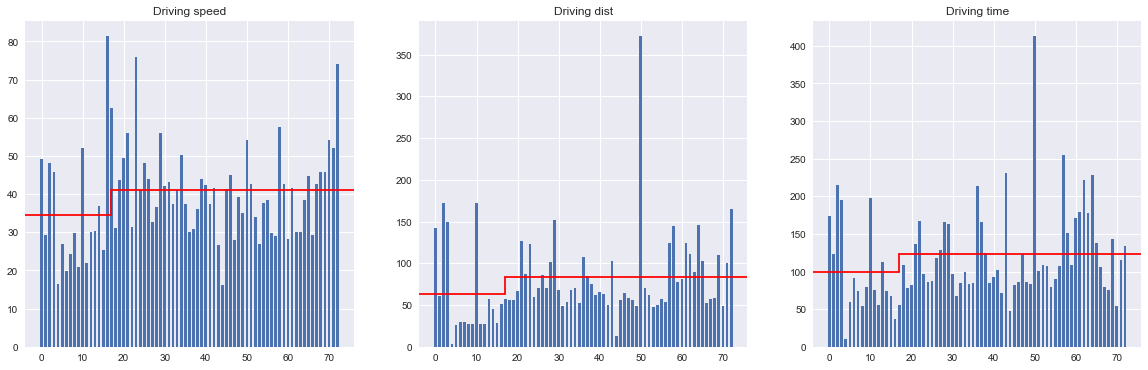

In [179]:
types = ['time','dist','speed']
means = {t:[] for t in types}
dicts = {t:{} for t in types}
for day in sorted(df_driving['BeginDate'].unique()):
    a = df_driving[df_driving['BeginDate'] == day].DurationMin.sum()
    b = df_driving[df_driving['BeginDate'] == day].Distance.sum()*0.001
    dicts['time'].update({day:a})
    dicts['dist'].update({day:b})
    dicts['speed'].update({day: b/(a/60)})


width = 1/1.5
index_move_out = 17
f, ax = plt.subplots(ncols=3, figsize=(20,6))

for i, (name, dic) in enumerate(dicts.items()):
    x = range(len(dic.values()))
    means[name].append(np.mean([elem[1] for elem in sorted(dic.items())][:index_move_out]))
    means[name].append(np.mean([elem[1] for elem in sorted(dic.items())][index_move_out:]))
    ax[i].bar(x, [elem[1] for elem in sorted(dic.items())], width)
    ax[i].set_title('Driving %s' % name)
    ax[i].axhline(means[name][0], xmin=0, xmax=(index_move_out+2)/len(x), color="red")
    ax[i].axhline(means[name][1], xmin=(index_move_out+2)/len(x), xmax=1,  color="red")
    ax[i].axvline(index_move_out, 
                  ymin=(means[name][0])/ax[i].axis()[3], 
                  ymax=(means[name][1])/ax[i].axis()[3],  
                  color='r')

print('Before moving out, in average:\n-%.1fmin per day\n-%.1fkm per day\n-%.1fkm/h per day\n'%(means['time'][0], means['dist'][0], means['speed'][0]))
print('After moving out, in average:\n-%.1fmin per day\n-%.1fkm per day\n-%.1fkm/h per day'%(means['time'][1], means['dist'][1], means['speed'][1]))

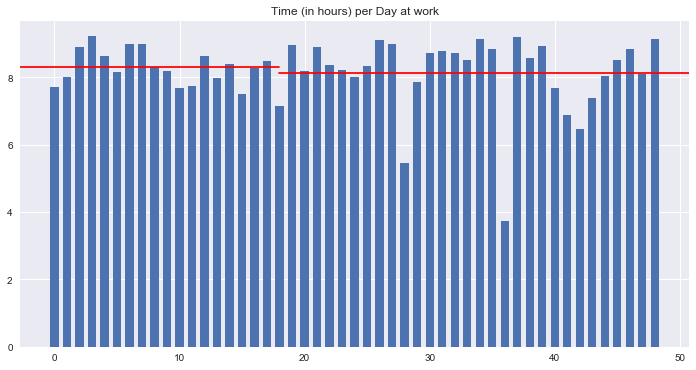

In [184]:
time_per_day_work = {}
for day in sorted(df_work['BeginDate']):
    time_per_day_work.update({day:df_work[df_work['BeginDate'] == day].DurationMin.sum() / 60})

x = range(len(time_per_day_work))
width = 1/1.5
# plt.bar(x,  [elem[1] for elem in sorted(time_per_day_work.items())], width)
# plt.axhline(np.mean(list(time_per_day_work.values())), color="red")
# plt.title('Time per Day at work')

mean_time_work_1 = np.mean([elem[1] for elem in sorted(time_per_day_work.items())][:index_move_out])
mean_time_work_2 = np.mean([elem[1] for elem in sorted(time_per_day_work.items())][index_move_out:])
plt.figure(figsize=(12,6))
plt.bar(x, [elem[1] for elem in sorted(time_per_day_work.items())], width)
plt.axhline(mean_time_work_1, xmin=0, xmax=(index_move_out+2)/len(x), color="red")
plt.axhline(mean_time_work_2, xmin=(index_move_out+2)/len(x), xmax=1,  color="red")
plt.title('Time (in hours) per Day at work')

In [211]:
a = pd.Series(pd.to_timedelta([elem for elem in df_work.BeginTime if elem < '10:30:00'])).mean().total_seconds()
b = pd.Series(pd.to_timedelta([elem for elem in df_work.EndTime if elem > '15:30:00'])).mean().total_seconds()
print("On average, I am at work from %s to %s" % (process_location.sec_to_time(a)[3],process_location.sec_to_time(b)[3]))

arriving_time = list(df_home_week_day[(df.BeginTime > '17:00:00') & (df.BeginTime < '21:00:00')].BeginTime)
departing_time = list(df_home_week_day[(df.EndTime > '07:00:00') & (df.EndTime < '10:00:00')].EndTime)
a = pd.Series(pd.to_timedelta(arriving_time)).mean().total_seconds()
b = pd.Series(pd.to_timedelta(departing_time)).mean().total_seconds()
print("On average, I am at home from %s to %s" % (process_location.sec_to_time(a)[3],process_location.sec_to_time(b)[3]))

On average, I am at work from 09:09:01 to 17:55:41
On average, I am at home from 18:59:07 to 08:30:01


/Users/alexandreattia/Desktop/Work/workenv/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/alexandreattia/Desktop/Work/workenv/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [213]:
## For Machine Learning with a time series, need to convert time to seconds (process_location.get_sec())

## Maps

### Generating Google Maps HTML plots

In [5]:
import gmplot

In [6]:
date = '2017-04-01'
concatenation = np.concatenate(list(df[df.BeginDate == date].Track))
longitudes, latitudes = [float(elem[0]) for elem in concatenation], [float(elem[1]) for elem in concatenation]

g = gmplot.GoogleMapPlotter(37.428, -122.145, 9)
g.scatter(latitudes, longitudes, 'b')
g.draw('scatter2.html')

In [279]:
number_of_days = 30
delta = datetime.strptime(df.loc[0, 'BeginDate'], '%Y-%m-%d') - timedelta(days=number_of_days)
concatenation = np.concatenate(list(df[df.BeginDate > delta.strftime("%Y-%m-%d")].Track))
longitudes, latitudes = [float(elem[0]) for elem in concatenation], [float(elem[1]) for elem in concatenation]

g = gmplot.GoogleMapPlotter(37.428, -122.145, 9)
g.heatmap(latitudes, longitudes)
g.draw('heatmap.html')

### Scatter plot

In [359]:
# San Francisco + San Mateo County
llcrnrlon_sf = -122.51608919999998 - 0.1
llcrnrlat_sf = 37.5421617 - 0.1
urcrnrlon_sf = -122.25853989999999 + 0.1
urcrnrlat_sf = 37.8718992 + 0.1
borders1 = (llcrnrlon_sf, llcrnrlat_sf, urcrnrlon_sf, urcrnrlat_sf)

# San Francisco
llcrnrlon_sf = -122.5051593 - 0.04
llcrnrlat_sf = 37.7331299 - 0.04
urcrnrlon_sf = -122.3864967 + 0.02
urcrnrlat_sf = 37.8201475 + 0.02
borders2 = (llcrnrlon_sf, llcrnrlat_sf, urcrnrlon_sf, urcrnrlat_sf)

In [350]:
restaurants = ['Restaurant', 'Cafe', 'Japanese', 'Sushi', 
               'Italian', 'American', 'Bakery', 'Mexican',
               'Californian Restaurant', 'Pizza', 'Greek',
               'French', 'Peruvian', 'Latin American Restaurant',
               'Asian Restaurant', 'Crêperie', 'Cocktail Bar']
stores = ["Clothing Store", "Shopping Mall", "Convenience Store",
         'Shoe Store', 'Women\'s Clothing Store', "Sportswear Store"]

/Users/alexandreattia/Desktop/Work/workenv/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/alexandreattia/Desktop/Work/workenv/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


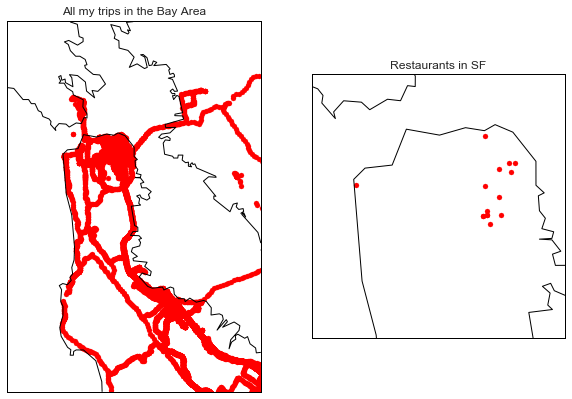

In [358]:
f, ax = plt.subplots(ncols=2, figsize=(10,15))
process_location.plot_basemap(df, borders1, ax=ax[0], title='All my trips in the Bay Area')
process_location.plot_basemap(df[df.Category.isin(restaurants)], borders2, ax=ax[1], title='Restaurants in SF')